In [1]:
import sys, os
import nilmtk
import matplotlib.pyplot as plt
%matplotlib inline

## path for load
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
## dataset loading
from adinilm.utils import paths_manager as pathsman

## Variable declaration for dataset
BUILDING = 1
START_TIME = "2015-01-01"
END_TIME = "2015-01-03"

## Dataset initialization
dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
dataset.set_window(start=START_TIME, end=END_TIME)

In [3]:
power_elec = dataset.buildings[BUILDING].elec

In [4]:
FRIDGE_FREEZER = "fridge freezer"
KETTLE = "kettle"
DISHWASHER = "dish washer"
MICROWAVE = "microwave"
WASHER_DRYER = "washer dryer"

applist = [FRIDGE_FREEZER, WASHER_DRYER, KETTLE, DISHWASHER, MICROWAVE]

In [5]:
fridge_elec = power_elec[FRIDGE_FREEZER].power_series_all_data()

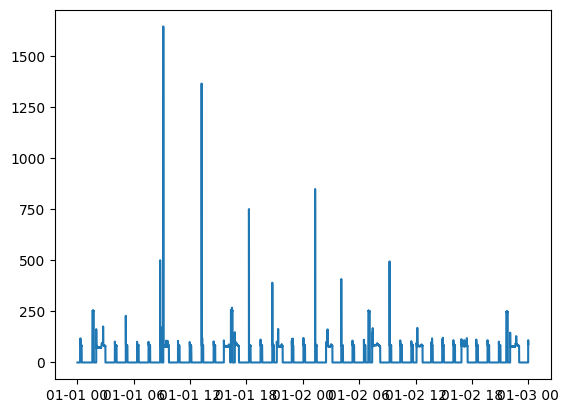

In [6]:
plt.plot(fridge_elec)

In [7]:
resampled_fridge_elec = power_elec[FRIDGE_FREEZER].power_series_all_data(sample_period=1, resample=True)

c:\users\mtinaco\dev\solutions\cos-algo-nilm\nilmtk\nilmtk\elecmeter.py:431: UserWarning: The provided sample_period (1) is shorter than the meter's sample_period (6)
  warn("The provided sample_period ({}) is shorter than the meter's sample_period ({})".format(


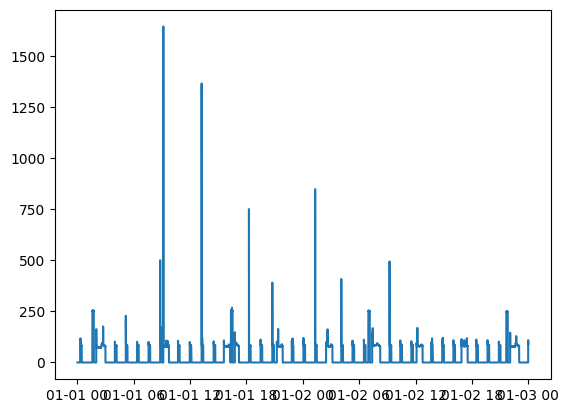

In [8]:
plt.plot(resampled_fridge_elec)

In [9]:
from nilmtk.preprocessing import Clip

In [10]:
clipper = Clip()
clipper.lower = 0
clipper.upper = 250
clipped_fridge_electric = power_elec[FRIDGE_FREEZER].power_series_all_data(
    preprocessing = [clipper], ac_type='best'
)

0 3300


c:\users\mtinaco\dev\solutions\cos-algo-nilm\nilmtk\nilmtk\electric.py:127: UserWarning: If you are using `preprocessing` to resample then please do not!  Instead, please use the `sample_period` parameter and set `resample=True`.
  warn("If you are using `preprocessing` to resample then please"


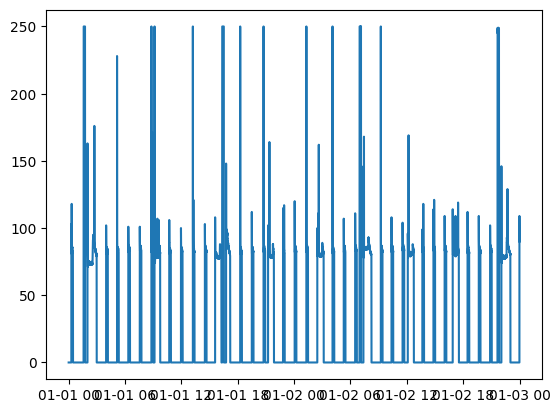

In [11]:
plt.plot(clipped_fridge_electric)